**Merging transactions**

In [286]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
'''Only to be used if "all_tranformations.csv" does not exist.'''
# df = pd.read_csv("data/transactions_1.csv")
# df2 = pd.read_csv("data/transactions_2.csv")
# df3 = pd.read_csv("data/transactions_3.csv")

# #combining datasets in one CSV
# transactions=pd.concat([df,df2,df3], ignore_index = True)

# #saving to directory
# transactions.to_csv(r'data/all_transactions.csv', index = False)

'Only to be used if "all_tranformations.csv" does not exist.'

**Merging datagrames**

In [287]:
df = pd.read_csv("data/all_transactions.csv")
df2 = pd.read_csv("data/users.csv")
df3 = pd.read_csv("data/devices.csv")
df4 = pd.merge(df2, df3[df3.brand != "Unknown"], on='user_id')
data = pd.merge(df4, df, on='user_id')
# df = pd.merge(df, df3, on='user_id')
# data = pd.merge(df, df2, on='user_id')

**Renaming columns**

In [288]:
data = data.rename(columns={"created_date_x": "user_created_date", "created_date_y": "transaction_created_date", "country": "user_country"})

**Removing unnecessary columns**

In [289]:
data = data.drop(['city', 'attributes_notifications_marketing_push', 'attributes_notifications_marketing_email', 'num_successful_referrals', 'ea_merchant_mcc', 'ea_merchant_city', 'ea_merchant_country', 'num_referrals'], axis=1)

**Column Tranformations**

In [290]:
plan_ = {"STANDARD": 0,"SILVER": 1,"GOLD": 1}
data['plan'] = data['plan'].map(plan_)

In [291]:
currency_ = {'AED' : 0, 'SEK' : 0, 'AUD' : 0, 'GBP' : 0, 'ETH' : 1, 'RUB' : 0, 'CHF' : 0, 'HRK' : 0, 'LTC' : 1, 'MAD' : 0, 'BTC' : 1, 'NZD' : 0, 'JPY' : 0, 'ILS' : 0, 'QAR' : 0, 'MXN' : 0, 'DKK' : 0, 'SGD' : 0, 'ZAR' : 0, 'BGN' : 0, 'USD' : 0, 'INR' : 0, 'THB' : 0, 'RON' : 0, 'HUF' : 0, 'TRY' : 0, 'XRP' : 1, 'PLN' : 0, 'EUR' : 0, 'BCH' : 1, 'CZK' : 0, 'CAD' : 0, 'NOK' : 0, 'HKD' : 0, 'SAR' : 0}
data['transactions_currency'] = data['transactions_currency'].map(currency_)

In [292]:
currency_ = {'FAILED': 0, 'DECLINED': 0, 'COMPLETED': 1, 'REVERTED': 2, 'PENDING': 0, 'CANCELLED': 0}
data['transactions_state'] = data['transactions_state'].map(currency_)

In [293]:
brands = {"Android": 0,"Apple": 1}
data['brand'] = data['brand'].map(brands)

In [294]:
# SWEU --> south western eu
# EEU --> Eastern Europe
# CEU --> Central Europe
# SWEU --> South Western Europe
# WEU --> Western Europe
# NEU ---> Norhern Europe
# AS --> ASIA
# NA --> northamerica
# AF --> Africa
# OC --> Oceania

#(oceania,namerica,africa,SEU)
#(SWEU,CEU,NEU,EEU)
#(Western Europe)


continents_ = {'ES':'SWEU', 'LT':'EEU', 'IE':'WEU', 'GB':'WEU', 'MT':'SWEU', 'FR':'SWEU', 'RO':'SWEU', 'PL':'EEU', 'AT':'CEU', 'IT':'SWEU', 'SI':'CEU', 'CZ':'CEU', 'BE':'WEU', 'BG':'SWEU', 'GI':'SWEU', 'CH':'AS', 'GG':'SWEU', 'CY':'SWEU', 'DE':'CEU', 'SK':'CEU', 'GR':'SEU', 'DK':'NEU', 'PT':'SWEU', 'LU':'NEU', 'HR':'SWEU', 'NL':'NEU', 'SE':'NEU', 'LV':'EEU', 'IM':'NEU', 'FI':'NEU', 'EE':'EEU', 'JE':'SWEU', 'HU':'CEU', 'NO':'NEU', 'RE':'AF', 'IS':'NEU', 'GP':'NA', 'AU':'OC', 'LI':'EEU', 'MQ':'NA'}
data['user_country'] = data['user_country'].map(continents_)


#Appending new Continents
new_continents_ = {'OC':'rest_of_the_world','NA':'rest_of_the_world','AF':'rest_of_the_world','SEU':'rest_of_the_world','AS':'rest_of_the_world',
               'SWEU':'Central_Europe','CEU':'Central_Europe','NEU':'Central_Europe','EEU':'Central_Europe',
                 'WEU':'Western_Europe'}

data['user_country'] = data['user_country'].map(new_continents_)


# Renaming Column
data = data.rename(columns={"user_country": "continent"})

In [295]:
data = data[(data.transactions_state == 1) | (data.transactions_state == 2)]

In [296]:
data['continent'].value_counts()

Central_Europe       1024059
Western_Europe        918553
rest_of_the_world      49584
Name: continent, dtype: int64

In [297]:
data['continent'].isna().sum()

0

**Plots**

In [298]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

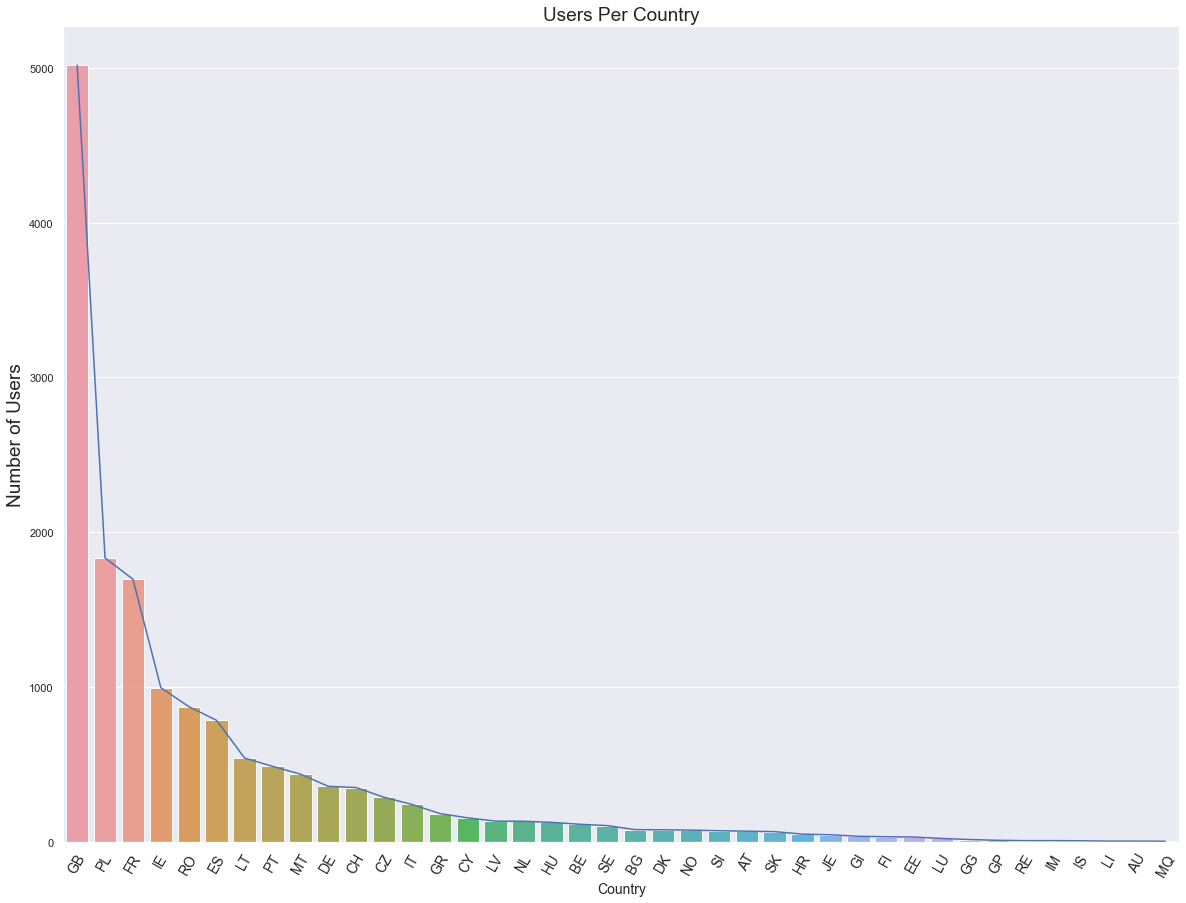

In [299]:
carrier_count = df2['country'].value_counts()
carrier_count.plot(figsize=(20,15))
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)

plt.title('Users Per Country',fontsize=19)
plt.ylabel('Number of Users', fontsize=19)
plt.xlabel('Country', fontsize=14)
plt.xticks(rotation=60,fontsize=14)

plt.show()

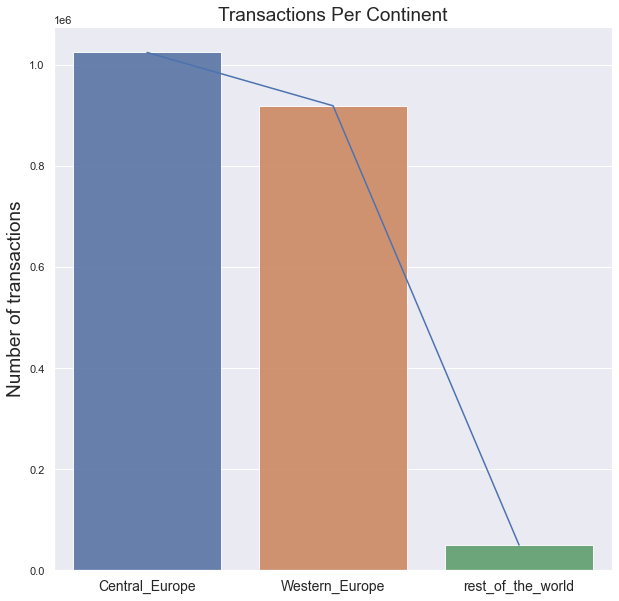

In [300]:
carrier_count = data['continent'].value_counts()
carrier_count.plot(figsize=(10,10))
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)

plt.title('Transactions Per Continent',fontsize=19)
plt.ylabel('Number of transactions', fontsize=19)
plt.xticks(fontsize=14)

plt.show()

**Aggregating**

In [301]:
def age_bands(year):
    year = 2020 - year
    if year < 25:
        return 0
    elif year < 35:
        return 1
    elif year < 45:
        return 2
    elif year < 55:
        return 3
    elif year < 65:
        return 4
    return 5

In [302]:
# Demographics
users_agg_df = data.groupby(['user_id']).agg({'birth_year': 'first', 'continent': 'first', 'user_created_date': 'first', 'user_settings_crypto_unlocked': 'first', 'plan': 'first', 'num_contacts': 'first', 'brand': 'first'}).reset_index()
users_agg_df["birth_year"] = users_agg_df["birth_year"].apply(lambda x: age_bands(x))
users_agg_df

,user_id,birth_year,continent,user_created_date,user_settings_crypto_unlocked,plan,num_contacts,brand
0,user_0,1,Central_Europe,2018-09-10 18:46:42.843855,0,0,3,1
1,user_1,2,Central_Europe,2018-01-11 18:53:10.531146,1,0,75,1
2,user_10,0,Central_Europe,2018-01-26 18:40:43.166413,1,0,19,1
3,user_100,1,Central_Europe,2018-12-02 14:18:09.034151,0,0,0,0
4,user_1000,1,Central_Europe,2018-03-22 22:08:56.267644,0,1,13,1
...,...,...,...,...,...,...,...,...
14902,user_9995,1,Central_Europe,2018-06-05 06:16:51.861843,0,0,0,1
14903,user_9996,4,Western_Europe,2018-10-26 03:59:55.030756,0,0,0,1
14904,user_9997,1,Western_Europe,2018-08-18 04:07:31.402857,0,0,6,0
14905,user_9998,1,Central_Europe,2019-01-02 02:17:00.962571,0,0,21,0


In [303]:
# First and last transaction of each user
first_transactions_date_agg = data.groupby(["user_id"]).agg({'transaction_created_date': 'min'}).reset_index().rename(columns={"transaction_created_date": "first_transaction_date"})
last_transactions_date_agg = data.groupby(["user_id"]).agg({'transaction_created_date': 'max'}).reset_index().rename(columns={"transaction_created_date": "last_transaction_date"})
transactions_date_agg = pd.merge(first_transactions_date_agg, last_transactions_date_agg, on="user_id")
transactions_date_agg

,user_id,first_transaction_date,last_transaction_date
0,user_0,2018-09-10 18:51:20.218855,2019-05-10 05:09:13.868855
1,user_1,2018-02-04 08:27:53.463146,2019-05-04 02:30:11.492146
2,user_10,2018-06-29 15:37:38.050413,2019-05-11 13:07:42.624413
3,user_100,2018-12-02 14:22:58.423151,2019-02-24 13:36:50.054151
4,user_1000,2019-03-27 11:03:23.105644,2019-05-05 19:08:42.183644
...,...,...,...
14902,user_9995,2018-06-16 19:51:44.248843,2019-05-01 12:21:34.372843
14903,user_9996,2018-10-26 04:02:43.183756,2019-01-08 05:59:32.103756
14904,user_9997,2018-08-18 04:15:20.234857,2019-04-27 00:32:53.447857
14905,user_9998,2019-01-02 02:23:38.707571,2019-03-15 09:27:13.108571


In [304]:
# Total transactions
user_transactions = data.groupby(["user_id"]).agg({'transaction_created_date': 'count'}).reset_index().rename(columns={"transaction_created_date": "n_transactions"})
user_transactions

,user_id,n_transactions
0,user_0,528
1,user_1,139
2,user_10,126
3,user_100,58
4,user_1000,43
...,...,...
14902,user_9995,6
14903,user_9996,32
14904,user_9997,136
14905,user_9998,31


In [305]:
# Total amounts of each user
transactions_total_agg = data[data.transactions_state == 1].groupby(["user_id"]).agg({'amount_usd': 'sum'}).reset_index()
transactions_total_agg = transactions_total_agg.rename(columns={"amount_usd": "amount_total"})
transactions_total_rev = data[data.transactions_state == 2].groupby(["user_id"]).agg({'amount_usd': 'sum'}).reset_index().rename(columns={'amount_usd': 'amount_reverted'})


transactions_total_agg = pd.merge(transactions_total_agg, transactions_total_rev, on="user_id", how="left").fillna(0.0)#converting NaN to 0

transactions_total_agg["total_amount"] = transactions_total_agg["amount_total"] - transactions_total_agg["amount_reverted"]
transactions_total_agg = transactions_total_agg[["user_id", "total_amount"]]
transactions_total_agg

,user_id,total_amount
0,user_0,6892.45
1,user_1,12953.66
2,user_10,5381.07
3,user_100,3716.07
4,user_1000,843.12
...,...,...
14784,user_9995,239.65
14785,user_9996,1680.76
14786,user_9997,4046.05
14787,user_9998,520.52


In [306]:
# Final df for classification
classification_df = pd.merge(users_agg_df, transactions_date_agg, on='user_id')
classification_df = pd.merge(classification_df, transactions_total_agg, on='user_id')
classification_df = pd.merge(classification_df, user_transactions, on='user_id')
classification_df.head()

,user_id,birth_year,continent,user_created_date,user_settings_crypto_unlocked,plan,num_contacts,brand,first_transaction_date,last_transaction_date,total_amount,n_transactions
0,user_0,1,Central_Europe,2018-09-10 18:46:42.843855,0,0,3,1,2018-09-10 18:51:20.218855,2019-05-10 05:09:13.868855,6892.45,528
1,user_1,2,Central_Europe,2018-01-11 18:53:10.531146,1,0,75,1,2018-02-04 08:27:53.463146,2019-05-04 02:30:11.492146,12953.66,139
2,user_10,0,Central_Europe,2018-01-26 18:40:43.166413,1,0,19,1,2018-06-29 15:37:38.050413,2019-05-11 13:07:42.624413,5381.07,126
3,user_100,1,Central_Europe,2018-12-02 14:18:09.034151,0,0,0,0,2018-12-02 14:22:58.423151,2019-02-24 13:36:50.054151,3716.07,58
4,user_1000,1,Central_Europe,2018-03-22 22:08:56.267644,0,1,13,1,2019-03-27 11:03:23.105644,2019-05-05 19:08:42.183644,843.12,43


In [307]:
#calculating how many days since First Transaction
classification_df['first_transaction_date'] = pd.to_datetime(classification_df['first_transaction_date'])
classification_df['last_transaction_date'] = pd.to_datetime(classification_df['last_transaction_date'])

delta = classification_df['last_transaction_date'] - classification_df['first_transaction_date']
classification_df['Days_Since_First_Transaction'] = delta.dt.days.astype(int)





In [308]:
#classification_df.head()
classification_df.tail()

,user_id,birth_year,continent,user_created_date,user_settings_crypto_unlocked,plan,num_contacts,brand,first_transaction_date,last_transaction_date,total_amount,n_transactions,Days_Since_First_Transaction
14784,user_9995,1,Central_Europe,2018-06-05 06:16:51.861843,0,0,0,1,2018-06-16 19:51:44.248843,2019-05-01 12:21:34.372843,239.65,6,318
14785,user_9996,4,Western_Europe,2018-10-26 03:59:55.030756,0,0,0,1,2018-10-26 04:02:43.183756,2019-01-08 05:59:32.103756,1680.76,32,74
14786,user_9997,1,Western_Europe,2018-08-18 04:07:31.402857,0,0,6,0,2018-08-18 04:15:20.234857,2019-04-27 00:32:53.447857,4046.05,136,251
14787,user_9998,1,Central_Europe,2019-01-02 02:17:00.962571,0,0,21,0,2019-01-02 02:23:38.707571,2019-03-15 09:27:13.108571,520.52,31,72
14788,user_9999,1,Central_Europe,2018-12-17 21:00:16.518284,0,0,0,1,2019-05-07 23:21:55.532284,2019-05-10 14:07:57.842284,-1.70,4,2


In [309]:
# The last day is considered as the date where the last_transaction was made in general(taking into account the completed minus reverted 2019-05-15 )
last_day = max(classification_df.last_transaction_date)

In [310]:
#calculating how many days since Last Transaction
#calculating how many days since user was Inactive

delta = last_day - classification_df['last_transaction_date']
classification_df['Days_Since_Last_Transaction'] = delta.dt.days.astype(int)



In [311]:

classification_df.head()

,user_id,birth_year,continent,user_created_date,user_settings_crypto_unlocked,plan,num_contacts,brand,first_transaction_date,last_transaction_date,total_amount,n_transactions,Days_Since_First_Transaction,Days_Since_Last_Transaction
0,user_0,1,Central_Europe,2018-09-10 18:46:42.843855,0,0,3,1,2018-09-10 18:51:20.218855,2019-05-10 05:09:13.868855,6892.45,528,241,5
1,user_1,2,Central_Europe,2018-01-11 18:53:10.531146,1,0,75,1,2018-02-04 08:27:53.463146,2019-05-04 02:30:11.492146,12953.66,139,453,11
2,user_10,0,Central_Europe,2018-01-26 18:40:43.166413,1,0,19,1,2018-06-29 15:37:38.050413,2019-05-11 13:07:42.624413,5381.07,126,315,4
3,user_100,1,Central_Europe,2018-12-02 14:18:09.034151,0,0,0,0,2018-12-02 14:22:58.423151,2019-02-24 13:36:50.054151,3716.07,58,83,80
4,user_1000,1,Central_Europe,2018-03-22 22:08:56.267644,0,1,13,1,2019-03-27 11:03:23.105644,2019-05-05 19:08:42.183644,843.12,43,39,10


In [312]:
#calculating how many days since user was Active

classification_df['user_created_date'] = pd.to_datetime(classification_df['user_created_date'])

delta = classification_df['last_transaction_date']-classification_df['user_created_date']
classification_df['Days_User_is_active'] = delta.dt.days.astype(int)

In [313]:
classification_df.dtypes

user_id                                  object
birth_year                                int64
continent                                object
user_created_date                datetime64[ns]
user_settings_crypto_unlocked             int64
plan                                      int64
num_contacts                              int64
brand                                     int64
first_transaction_date           datetime64[ns]
last_transaction_date            datetime64[ns]
total_amount                            float64
n_transactions                            int64
Days_Since_First_Transaction              int32
Days_Since_Last_Transaction               int32
Days_User_is_active                       int32
dtype: object

In [314]:
classification_df.head()

,user_id,birth_year,continent,user_created_date,user_settings_crypto_unlocked,plan,num_contacts,brand,first_transaction_date,last_transaction_date,total_amount,n_transactions,Days_Since_First_Transaction,Days_Since_Last_Transaction,Days_User_is_active
0,user_0,1,Central_Europe,2018-09-10 18:46:42.843855,0,0,3,1,2018-09-10 18:51:20.218855,2019-05-10 05:09:13.868855,6892.45,528,241,5,241
1,user_1,2,Central_Europe,2018-01-11 18:53:10.531146,1,0,75,1,2018-02-04 08:27:53.463146,2019-05-04 02:30:11.492146,12953.66,139,453,11,477
2,user_10,0,Central_Europe,2018-01-26 18:40:43.166413,1,0,19,1,2018-06-29 15:37:38.050413,2019-05-11 13:07:42.624413,5381.07,126,315,4,469
3,user_100,1,Central_Europe,2018-12-02 14:18:09.034151,0,0,0,0,2018-12-02 14:22:58.423151,2019-02-24 13:36:50.054151,3716.07,58,83,80,83
4,user_1000,1,Central_Europe,2018-03-22 22:08:56.267644,0,1,13,1,2019-03-27 11:03:23.105644,2019-05-05 19:08:42.183644,843.12,43,39,10,408


In [316]:
classification_df['n_transactions'].describe()

count    14789.000000
mean       134.690648
std        228.158511
min          1.000000
25%         15.000000
50%         54.000000
75%        152.000000
max       3103.000000
Name: n_transactions, dtype: float64

In [317]:
classification_df['Days_Since_First_Transaction'].describe()

count    14789.000000
mean       211.679762
std        131.961345
min          0.000000
25%        118.000000
50%        206.000000
75%        314.000000
max        493.000000
Name: Days_Since_First_Transaction, dtype: float64

In [318]:
classification_df['Days_Since_Last_Transaction'].describe()

count    14789.000000
mean        71.057340
std        101.433723
min          0.000000
25%          7.000000
50%         19.000000
75%         97.000000
max        496.000000
Name: Days_Since_Last_Transaction, dtype: float64

In [319]:
classification_df['Days_User_is_active'].describe()

count    14789.000000
mean       226.011292
std        131.168279
min          0.000000
25%        135.000000
50%        221.000000
75%        328.000000
max        493.000000
Name: Days_User_is_active, dtype: float64

# One Hot Encoding


In [ ]:
#one hot encoding
dum = pd.get_dummies(classification_df.continent)
classification_df = pd.concat([classification_df, dum], axis=1)
classification_df['label'] = classification_df['plan']
classification_df = classification_df.drop(columns=['continent', 'plan']).rename(columns={'birth_year': 'age_band'})
classification_df.head()

**Train/test splitting**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x = classification_df[['age_band', 'user_settings_crypto_unlocked', 'num_contacts', 'brand', 'total_amount', 'n_transactions', 'Central_Europe', 'Central_Europe', 'rest_of_the_world']]
y = classification_df['label']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

**Scaling**

In [25]:
from sklearn.preprocessing import RobustScaler# For outliers

In [26]:
scaler = RobustScaler().fit(x_train)

In [27]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

**Balancing**

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
print(f'Number of users with plan 0 pre-balancing: {len(y_train[y_train == 0])} and with plan 1: {len(y_train[y_train == 1])}')

Number of users with plan 0 pre-balancing: 10912 and with plan 1: 919


In [30]:
sm = SMOTE(random_state=10)
x_train_res, y_train_res = sm.fit_resample(x_train_scaled, y_train)

In [31]:
print(f'Number of users with plan 0 post-balancing: {len(y_train_res[y_train_res == 0])} and with plan 1: {len(y_train_res[y_train_res == 1])}')

Number of users with plan 0 post-balancing: 10912 and with plan 1: 10912


**Models**

In [56]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pickle

class MLModels(object):
    x_train = None
    x_test = None
    y_train = None
    y_test = None
    model = None
    parameters = None
    best_estimator = None

    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test

    def grid_search(self):
        clf_ = GridSearchCV(
            self.model, param_grid=self.parameters, n_jobs=4, scoring='f1_macro'
        )
        clf_.fit(self.x_train, self.y_train)
        self.best_estimator = clf_.best_estimator_
        print(f"Best estimator recall: {clf_.best_score_}")
        y_pred_ = self.best_estimator.predict(self.x_test)
        print('Precision Score : ' + str(precision_score(self.y_test, y_pred_)))
        print(f'Recall Score : {recall_score(self.y_test, y_pred_)}')
        print(classification_report(self.y_test, y_pred_))
        print(confusion_matrix(self.y_test, y_pred_))
        
    def pickle_estimator(self, name):
        pickle.dump(self.best_estimator, open(f'{name}.pkl', 'wb'))
        
    def unpickle_estimator(self, name):
        self.best_estimator = pickle.load(open(f'{name}.pkl', 'rb'))
        
    def predict(self):
        y_pred_ = self.best_estimator.predict(self.x_test)
        print('Precision Score : ' + str(precision_score(self.y_test, y_pred_)))
        print(f'Recall Score : {recall_score(self.y_test, y_pred_)}')
        print(classification_report(self.y_test, y_pred_))
        print(confusion_matrix(self.y_test, y_pred_))

    def logistic_regression(self):
        self.model = LogisticRegression()
        self.parameters = [
            {
                'solver': ['saga'], 'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 1, 10, 25],
                'max_iter': [10, 20, 50, 100]
            },
            {
                'solver': ['sag', 'lbfgs'], 'penalty': ['l2'], 'C': [0.001, 0.01, 1, 10, 25],
                'max_iter': [10, 20, 50, 100]
            }
        ]

    def knn(self):
        self.model = KNeighborsClassifier()
        self.parameters = [
            {
                'n_neighbors': [3,9,15,21], 
                'leaf_size': [0,15,20,25,30],
                'p': [1,2],
                'algorithm': ['auto'],
                'weights':['uniform','distance']
            }
        ]
    def DecisionTree(self):
        self.model = DecisionTreeClassifier()
        self.parameters = [
            {
                'min_samples_leaf': [1,2,3,4], 
                
                'max_depth': [1,2,4,6],
                'ccp_alpha': [0.005,0.010,0.015,0.020,0.025],
                #'criterion': ['gini','entropy']
                
            }
        ]
        
    def Gaussian(self):
        self.model = GaussianNB()
        self.parameters = [
            {
                #'fit_prior': [True,False], 
                #'alpha': [0,1.0,1.5,3,5] 
                
                
            }
           
        ]

        
    def Bernouli(self):
        self.model = BernoulliNB()
        self.parameters = [
            {
                #'fit_prior': [True,False], 
                #'alpha': [0,1.0,1.5,3,5] 
                
                
            }
           
        ]
        
    def random_forest(self):
        self.model = RandomForestClassifier()
        self.parameters = \
            {
                'n_jobs': [-1], 'n_estimators': [10, 50, 100, 200], 'max_depth': [3, 5], 'criterion': ['gini', 'entropy']
            }

    def svm_classifier(self):
        self.model = SVC()
        self.parameters = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'sigmoid']}
        
model = MLModels(x_train_res, x_test_scaled, y_train_res, y_test)

In [57]:
model.logistic_regression()
model.grid_search()
model.pickle_estimator("lr")

Best estimator recall: 0.7010610277819649
Precision Score : 0.2537764350453172
Recall Score : 0.7601809954751131
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      2737
           1       0.25      0.76      0.38       221

    accuracy                           0.82      2958
   macro avg       0.62      0.79      0.64      2958
weighted avg       0.92      0.82      0.85      2958

[[2243  494]
 [  53  168]]


In [58]:
model.knn()
model.grid_search()
model.pickle_estimator("lr")

Best estimator recall: 0.7007861346720115
Precision Score : 0.2537764350453172
Recall Score : 0.7601809954751131
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      2737
           1       0.25      0.76      0.38       221

    accuracy                           0.82      2958
   macro avg       0.62      0.79      0.64      2958
weighted avg       0.92      0.82      0.85      2958

[[2243  494]
 [  53  168]]


In [ ]:
model.DecisionTree()
model.grid_search()
model.pickle_estimator("dt")

In [ ]:
model.Bernouli()
model.grid_search()
model.pickle_estimator("bnb")

In [ ]:
model.Gaussian()
model.grid_search()
model.pickle_estimator("gnb")

In [ ]:
model.svm_classifier()
model.grid_search()
model.pickle_estimator("svm")

In [ ]:
model.random_forest()
model.grid_search()
model.pickle_estimator("rf")

**Tests and raw code**

In [ ]:
len(data[(data.transactions_state == 2) & (data.direction=="INBOUND")])

In [ ]:
pd.crosstab(index=data['transactions_type'],columns=data['transactions_state'])

In [ ]:
pd.crosstab(index=data['transactions_type'],columns=data['direction'])

In [ ]:
pd.crosstab(index=data['direction'],columns=data['transactions_state'])

In [ ]:
data[(data.user_id == "user_7") & (data.transactions_state == 2) & (data.amount_usd == 8.51) & (data.direction == "INBOUND")]

In [ ]:
data[data["user_id"] == "user_12038"].sort_values(by='transaction_created_date', ascending=True)

In [ ]:
pd.crosstab(index=data['transactions_type'],columns=data['ea_cardholderpresence'])

In [ ]:
data['num_contacts'].describe()

In [ ]:
data['ea_cardholderpresence'].value_counts()